# Apprentissage Automatique : Prédiction de l'Indice Boursier


## 1. Introduction et Objectifs


### Contexte
Ce projet vise à analyser et prédire l'évolution d'un indice boursier l'indice des actions en utilisant des techniques de machine learning.
Le fichier CSV contient des informations sur plusieurs facteurs influençant l'indice boursier : température, émissions de CO2, taux de change, taux d'intérêt et prix du pétrole.
### Objectifs
- Charger et explorer les données.
- Nettoyer et préparer les données pour l'analyse.
- Effectuer une analyse exploratoire des données (EDA).
- Détecter et traiter les valeurs aberrantes.
- Préparer les données pour le machine learning.
- Entraîner et évaluer un modèle de prédiction.
- Conclure sur les résultats obtenus et discuter des perspectives futures.


## 2. Chargement des Données

### Importation des Bibliothèques
```python

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

### Chargement des Données


In [32]:
file_path = "Données.csv"
df = pd.read_csv(file_path, sep=";", encoding="utf-8", header=0)

### Vérification Initiale des Données


In [33]:
# Afficher les premières lignes du DataFrame
df.head()

,date,Indice des actions,Température,Emission CO2,Emission CO2.1,Euro to US $,Taux d'intérêt,Prix du pétrole
0,02/01/2019,"10580,19","0,89","1,56120991","1561209,91","0,88071","0,171","54,06"
1,03/01/2019,"10416,66","-1,8","1,89769072","1897690,72","0,87781","0,151","53,23"
2,04/01/2019,"10767,69","0,58","2,01433176","2014331,76","0,87646","0,208","55,64"
3,07/01/2019,"10747,81","2,29","2,08264972","2082649,72","0,87249","0,216","57,1"
4,08/01/2019,"10803,98","4,05","2,16711233","2167112,33","0,87401","0,23","56,91"


In [34]:
# Informations sur les colonnes et les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                1217 non-null   object
 1   Indice des actions  1217 non-null   object
 2   Température         1217 non-null   object
 3   Emission CO2        1217 non-null   object
 4   Emission CO2.1      1217 non-null   object
 5   Euro to US $        1217 non-null   object
 6   Taux d'intérêt      1217 non-null   object
 7   Prix du pétrole     1217 non-null   object
dtypes: object(8)
memory usage: 76.2+ KB


In [35]:
# Statistiques descriptives
df.describe()

,date,Indice des actions,Température,Emission CO2,Emission CO2.1,Euro to US $,Taux d'intérêt,Prix du pétrole
count,1217,1217,1217,1217,1217,1217,1217,1217
unique,1217,1188,969,1217,1217,1012,852,1083
top,02/01/2019,"13300,98","2,19","1,56120991","1561209,91","0,88359","-0,296","70,71"
freq,1,4,4,1,1,4,5,5


In [36]:
# Vérification des valeurs manquantes
df.isnull().sum()

date                  0
Indice des actions    0
Température           0
Emission CO2          0
Emission CO2.1        0
Euro to US $          0
Taux d'intérêt        0
Prix du pétrole       0
dtype: int64

## 3. Nettoyage des Données
## 
Suppression de la Colonne 'Emission CO2.1'

In [37]:
# Suppression de la colonne 'Emission CO2.1' car elle semble redondante avec 'Emission CO2'
if 'Emission CO2.1' in df.columns:
    df = df.drop(columns=['Emission CO2.1'])


In [38]:
df.head()

,date,Indice des actions,Température,Emission CO2,Euro to US $,Taux d'intérêt,Prix du pétrole
0,02/01/2019,"10580,19","0,89","1,56120991","0,88071","0,171","54,06"
1,03/01/2019,"10416,66","-1,8","1,89769072","0,87781","0,151","53,23"
2,04/01/2019,"10767,69","0,58","2,01433176","0,87646","0,208","55,64"
3,07/01/2019,"10747,81","2,29","2,08264972","0,87249","0,216","57,1"
4,08/01/2019,"10803,98","4,05","2,16711233","0,87401","0,23","56,91"


### Conversion des Nombres avec Virgule en Nombres Décimaux


In [39]:
# Conversion des nombres avec virgule en nombres décimaux
cols_to_convert = ["Indice des actions", "Température", "Emission CO2", "Euro to US $", "Taux d'intérêt", "Prix du pétrole"]
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(r'[^\d.]', '', regex=True).astype(float)

In [40]:
df.head()

,date,Indice des actions,Température,Emission CO2,Euro to US $,Taux d'intérêt,Prix du pétrole
0,02/01/2019,10580.19,0.89,1.561210,0.88071,0.171,54.06
1,03/01/2019,10416.66,1.80,1.897691,0.87781,0.151,53.23
2,04/01/2019,10767.69,0.58,2.014332,0.87646,0.208,55.64
3,07/01/2019,10747.81,2.29,2.082650,0.87249,0.216,57.10
4,08/01/2019,10803.98,4.05,2.167112,0.87401,0.230,56.91


### Conversion de la Colonne 'date'


In [41]:
# Conversion de la colonne 'date' en type datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

In [42]:
df.head()

,date,Indice des actions,Température,Emission CO2,Euro to US $,Taux d'intérêt,Prix du pétrole
0,2019-01-02,10580.19,0.89,1.561210,0.88071,0.171,54.06
1,2019-01-03,10416.66,1.80,1.897691,0.87781,0.151,53.23
2,2019-01-04,10767.69,0.58,2.014332,0.87646,0.208,55.64
3,2019-01-07,10747.81,2.29,2.082650,0.87249,0.216,57.10
4,2019-01-08,10803.98,4.05,2.167112,0.87401,0.230,56.91


### Vérification des Types de Données Après Conversion


In [43]:
df.dtypes

date                  datetime64[ns]
Indice des actions           float64
Température                  float64
Emission CO2                 float64
Euro to US $                 float64
Taux d'intérêt               float64
Prix du pétrole              float64
dtype: object

## 4. Visualisation des Données Après Nettoyage
### Distribution des Variables Après Conversion



In [44]:
df_without_date = df.drop(columns=['date'])
print(df_without_date.describe())

       Indice des actions  Température  Emission CO2  Euro to US $  \
count         1217.000000  1217.000000   1217.000000   1217.000000   
mean         13710.163657    10.994232      1.797045      0.896188   
std           1648.296530     7.513632      0.386183      0.046698   
min           8441.710000     0.020000      1.069210      0.812980   
25%          12480.020000     4.220000      1.510372      0.858550   
50%          13587.230000    10.120000      1.709196      0.894940   
75%          15365.270000    17.560000      2.073964      0.920600   
max          16469.750000    29.540000      2.994248      1.039390   

       Taux d'intérêt  Prix du pétrole  
count     1217.000000      1217.000000  
mean         0.828563        71.012794  
std          0.816139        22.108356  
min          0.001000         9.120000  
25%          0.270000        59.480000  
50%          0.466000        70.560000  
75%          1.148000        83.530000  
max          2.754000       133.180000  


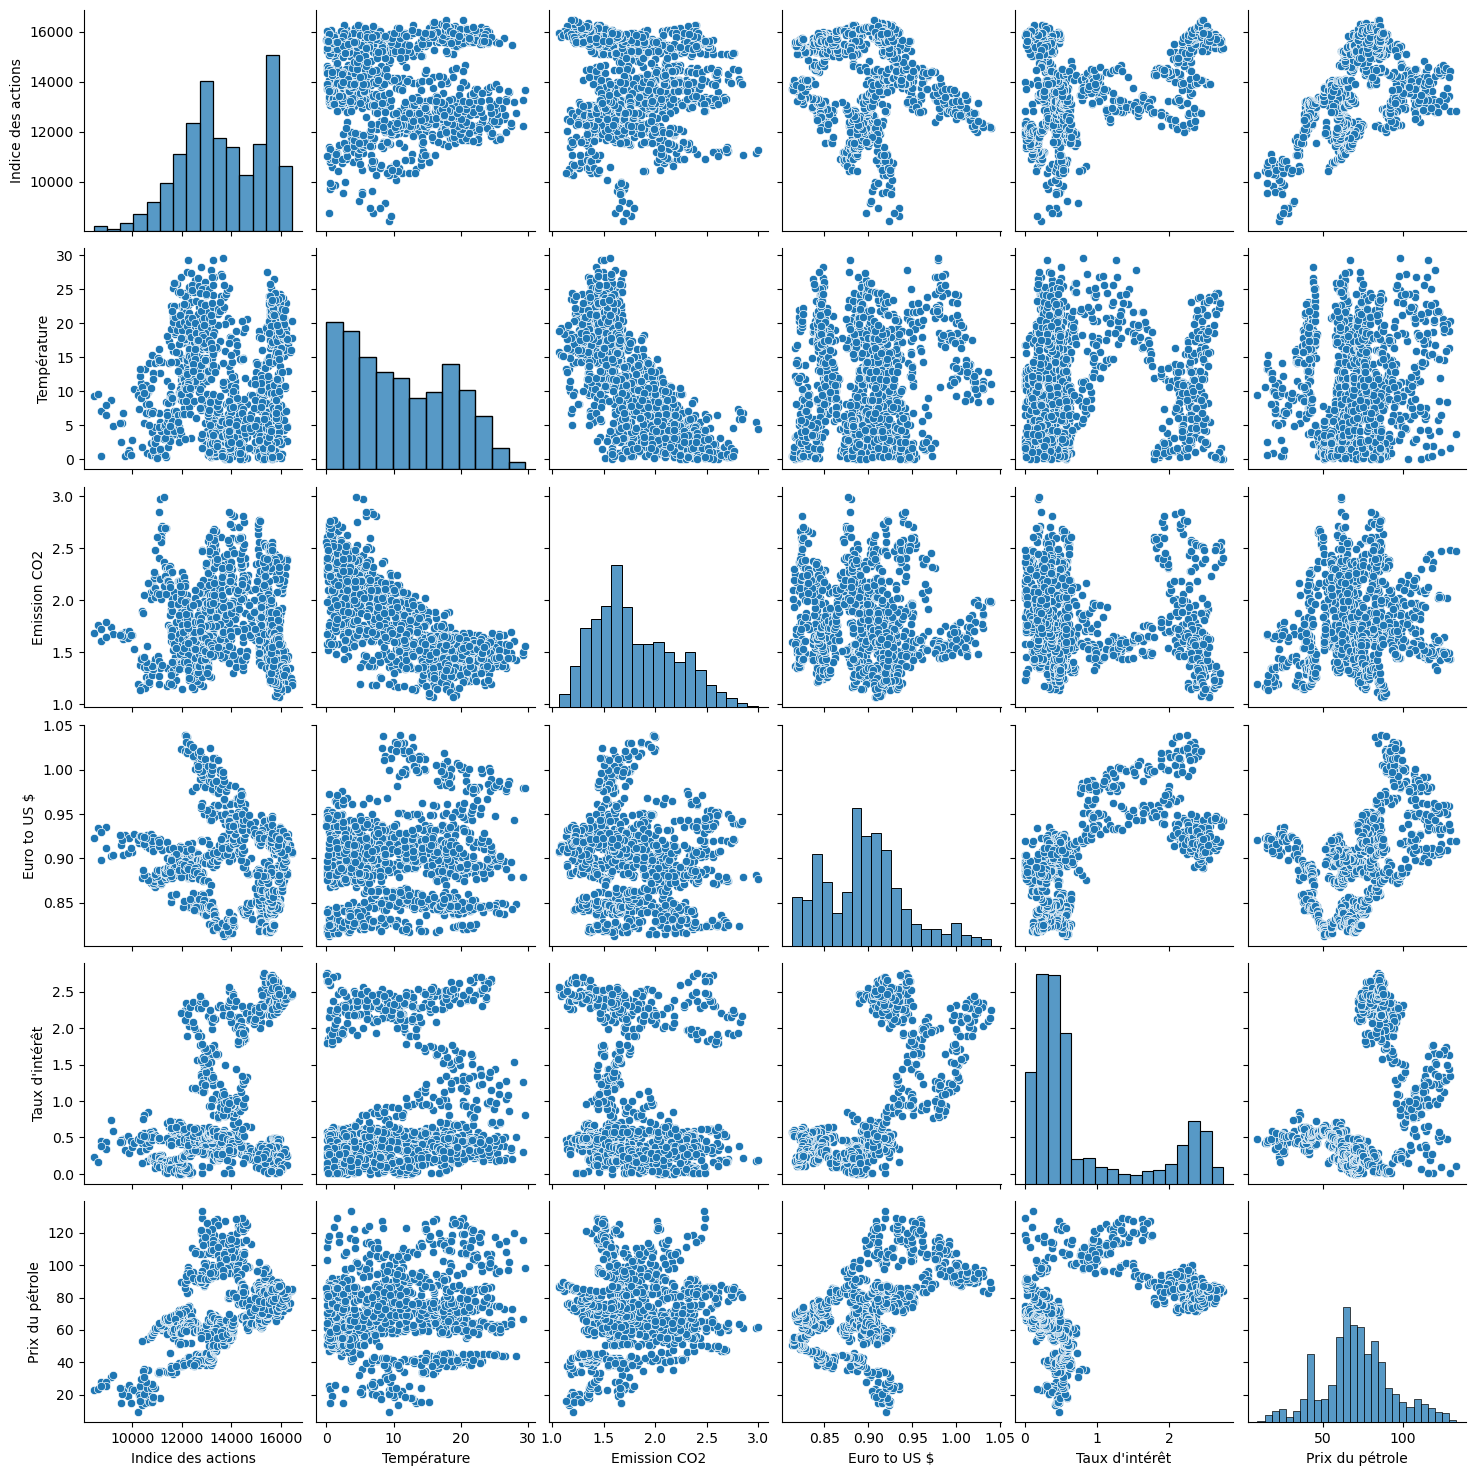

In [45]:
sns.pairplot(df_without_date)
plt.show()

## 5. Détection des Outliers
### Détection des Outliers avec la Méthode de l'IQR

In [46]:
Q1 = df_without_date.quantile(0.25)
Q3 = df_without_date.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_without_date < (Q1 - 1.5 * IQR)) | (df_without_date > (Q3 + 1.5 * IQR))).sum()
print("Nombre d'outliers détectés par variable :")
print(outliers)

Nombre d'outliers détectés par variable :
Indice des actions     0
Température            0
Emission CO2           2
Euro to US $          22
Taux d'intérêt        59
Prix du pétrole       56
dtype: int64


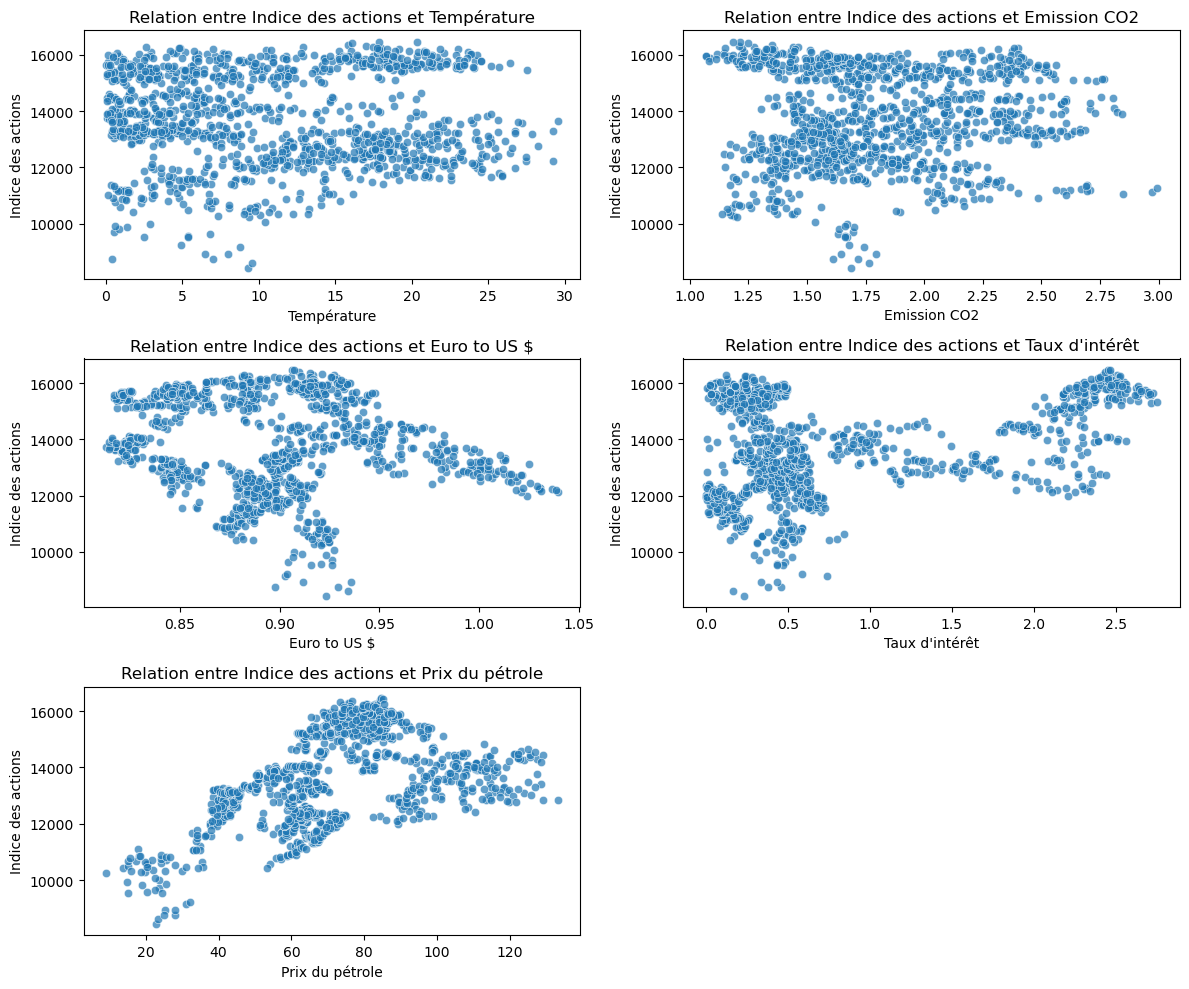

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 lignes, 2 colonnes
axes = axes.flatten()  # Transformer en tableau 1D

# Liste des variables explicatives
variables = ["Température", "Emission CO2", "Euro to US $", "Taux d'intérêt", "Prix du pétrole"]

# Tracer chaque scatter plot
for i, var in enumerate(variables):
    sns.scatterplot(x=df[var], y=df["Indice des actions"], ax=axes[i], alpha=0.7)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Indice des actions")
    axes[i].set_title(f"Relation entre Indice des actions et {var}")

# Supprimer le dernier sous-graphe inutilisé si le nombre de variables est impair
if len(variables) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()  # Ajuste la mise en page
plt.show()

Skewness: -0.2732103566292778


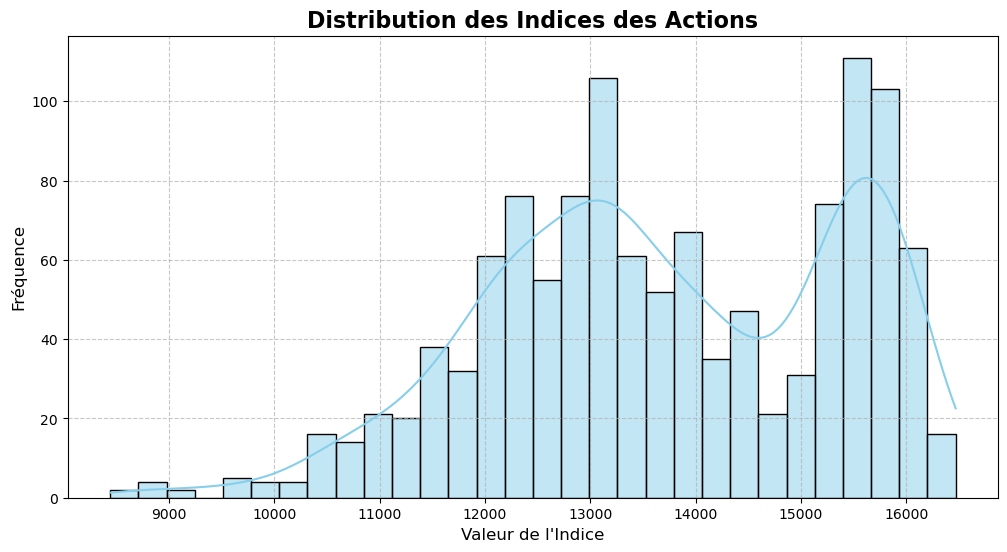

In [48]:
# Compute skewness
skewness = df['Indice des actions'].skew()
print("Skewness:", skewness)

# Create a more polished plot
plt.figure(figsize=(12, 6))  # Slightly larger figure for better detail
sns.histplot(df['Indice des actions'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Customizing the plot
plt.title("Distribution des Indices des Actions", fontsize=16, fontweight='bold')
plt.xlabel("Valeur de l'Indice", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

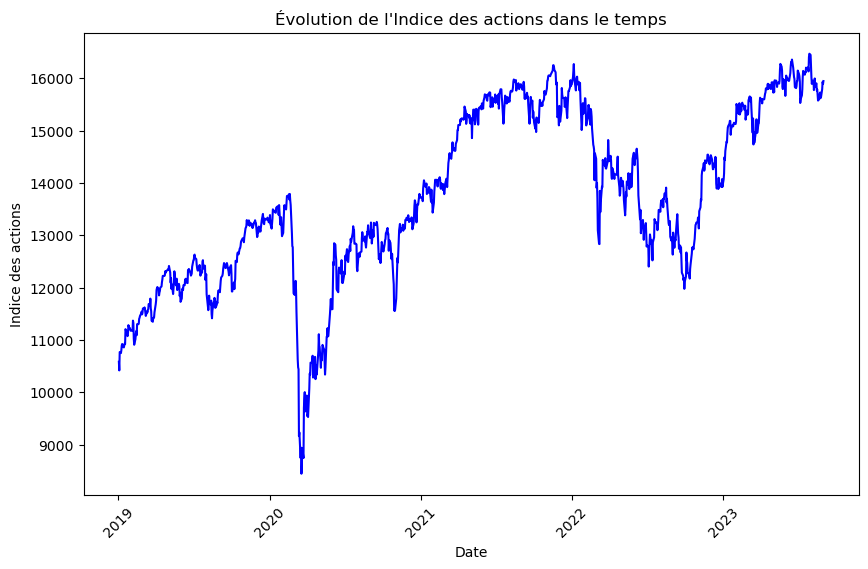

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Indice des actions'], color='blue')
plt.title("Évolution de l'Indice des actions dans le temps")
plt.xlabel("Date")
plt.ylabel("Indice des actions")
plt.xticks(rotation=45)
plt.show()

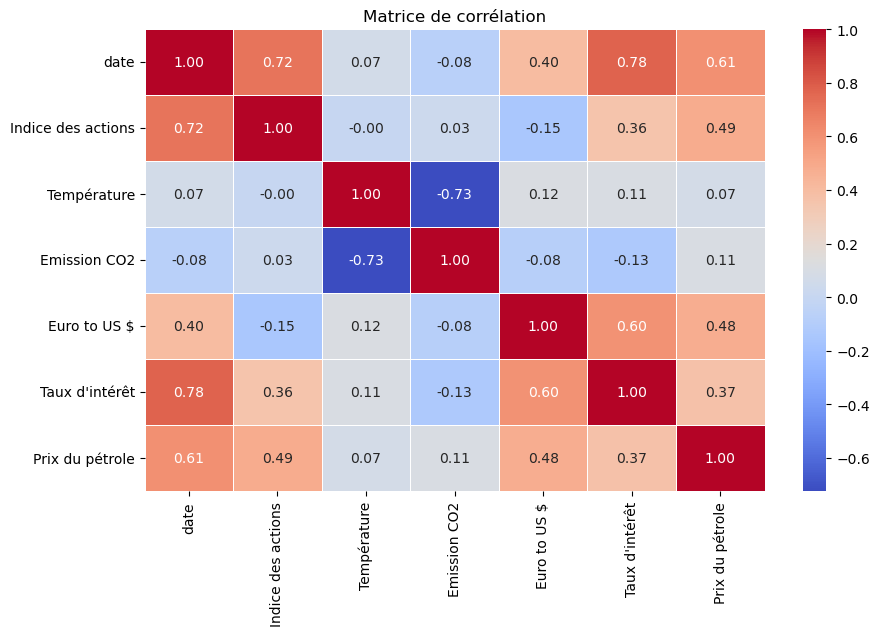

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


        date  Prix du pétrole  Rendement_ln_petrol
0 2019-01-02            54.06                  NaN
1 2019-01-03            53.23            -0.015472
2 2019-01-04            55.64             0.044280
3 2019-01-07            57.10             0.025902
4 2019-01-08            56.91            -0.003333


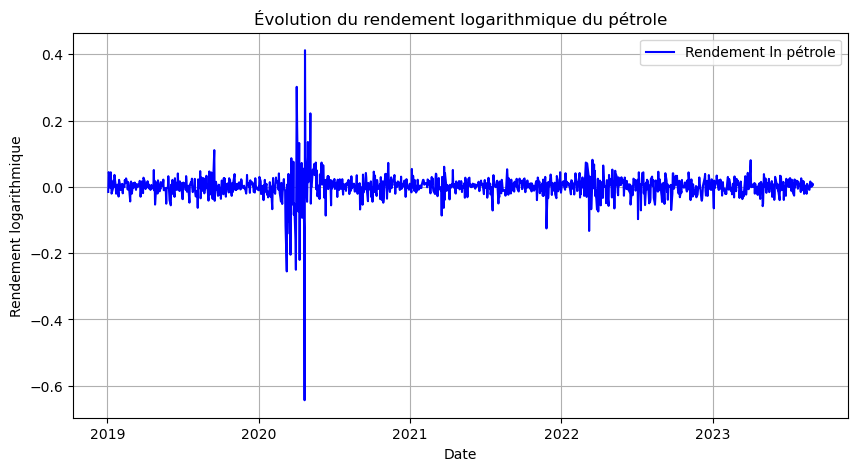

In [51]:
# Calcul du rendement logarithmique du pétrole
df['Rendement_ln_petrol'] = np.log(df['Prix du pétrole'] / df['Prix du pétrole'].shift(1))

# Affichage des premières lignes pour vérifier
print(df[['date', 'Prix du pétrole', 'Rendement_ln_petrol']].head())

# Tracé du rendement logarithmique
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Rendement_ln_petrol'], label='Rendement ln pétrole', color='b')
plt.xlabel('Date')
plt.ylabel('Rendement logarithmique')
plt.title('Évolution du rendement logarithmique du pétrole')
plt.legend()
plt.grid()
plt.show()

        date  Indice des actions  Rendement_ln_actions
0 2019-01-02            10580.19                   NaN
1 2019-01-03            10416.66             -0.015577
2 2019-01-04            10767.69              0.033144
3 2019-01-07            10747.81             -0.001848
4 2019-01-08            10803.98              0.005213


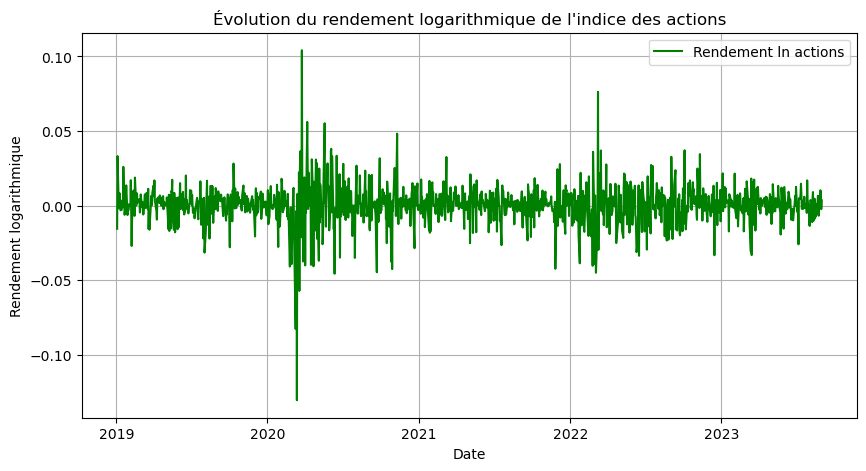

In [52]:
# Vérifier que la colonne 'date' est bien au format datetime
df['date'] = pd.to_datetime(df['date'])

# Calcul du rendement logarithmique de l'indice des actions
df['Rendement_ln_actions'] = np.log(df['Indice des actions'] / df['Indice des actions'].shift(1))

# Afficher les premières lignes pour vérifier le calcul
print(df[['date', 'Indice des actions', 'Rendement_ln_actions']].head())

# Tracer le rendement logarithmique de l'indice des actions
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Rendement_ln_actions'], label='Rendement ln actions', color='g')
plt.xlabel('Date')
plt.ylabel('Rendement logarithmique')
plt.title('Évolution du rendement logarithmique de l\'indice des actions')
plt.legend()
plt.grid()
plt.show()

        date  Euro to US $  Rendement_ln_euro_usd
0 2019-01-02       0.88071                    NaN
1 2019-01-03       0.87781              -0.003298
2 2019-01-04       0.87646              -0.001539
3 2019-01-07       0.87249              -0.004540
4 2019-01-08       0.87401               0.001741


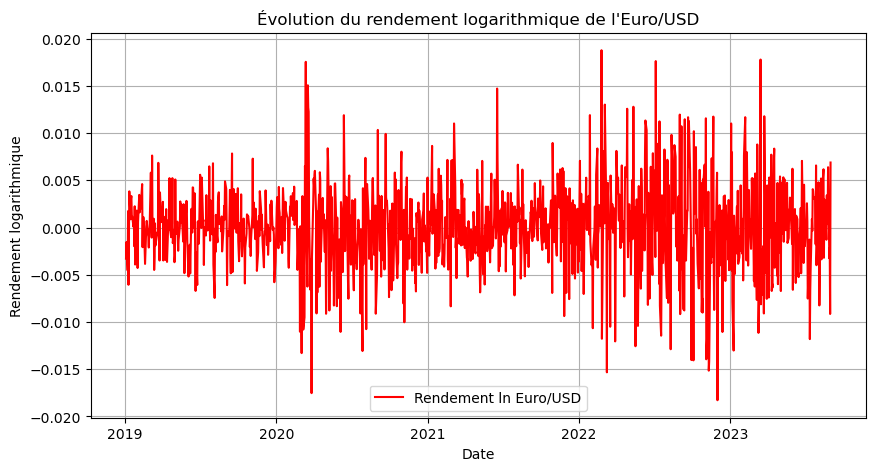

In [53]:
# Vérifier que la colonne 'date' est bien au format datetime
df['date'] = pd.to_datetime(df['date'])

# Calcul du rendement logarithmique de la conversion Euro/USD
df['Rendement_ln_euro_usd'] = np.log(df['Euro to US $'] / df['Euro to US $'].shift(1))

# Afficher les premières lignes pour vérifier le calcul
print(df[['date', 'Euro to US $', 'Rendement_ln_euro_usd']].head())

# Tracer l'évolution du rendement logarithmique Euro/USD
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Rendement_ln_euro_usd'], label='Rendement ln Euro/USD', color='r')
plt.xlabel('Date')
plt.ylabel('Rendement logarithmique')
plt.title('Évolution du rendement logarithmique de l\'Euro/USD')
plt.legend()
plt.grid()
plt.show()

## 6. Préparation des Données pour le Machine Learning
### Normalisation des Données

In [54]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_date)
df_scaled = pd.DataFrame(df_scaled, columns=df_without_date.columns)
df_scaled.head()

,Indice des actions,Température,Emission CO2,Euro to US $,Taux d'intérêt,Prix du pétrole
0,-1.899695,-1.345339,-0.610934,-0.331589,-0.806031,-0.767120
1,-1.998947,-1.224176,0.260724,-0.393716,-0.830547,-0.804678
2,-1.785894,-1.386615,0.562884,-0.422638,-0.760677,-0.695624
3,-1.797960,-1.158935,0.739862,-0.507687,-0.750870,-0.629559
4,-1.763869,-0.924598,0.958663,-0.475124,-0.733709,-0.638157


### Séparation des Données en Ensembles d'Entraînement et de Test


In [55]:
X = df_scaled.drop(columns=['Indice des actions'])
y = df_scaled['Indice des actions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les tailles des ensembles
print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (973, 5)
Taille de X_test : (244, 5)
Taille de y_train : (973,)
Taille de y_test : (244,)


C:\Users\dell\AppData\Local\Temp\ipykernel_15824\3419019504.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


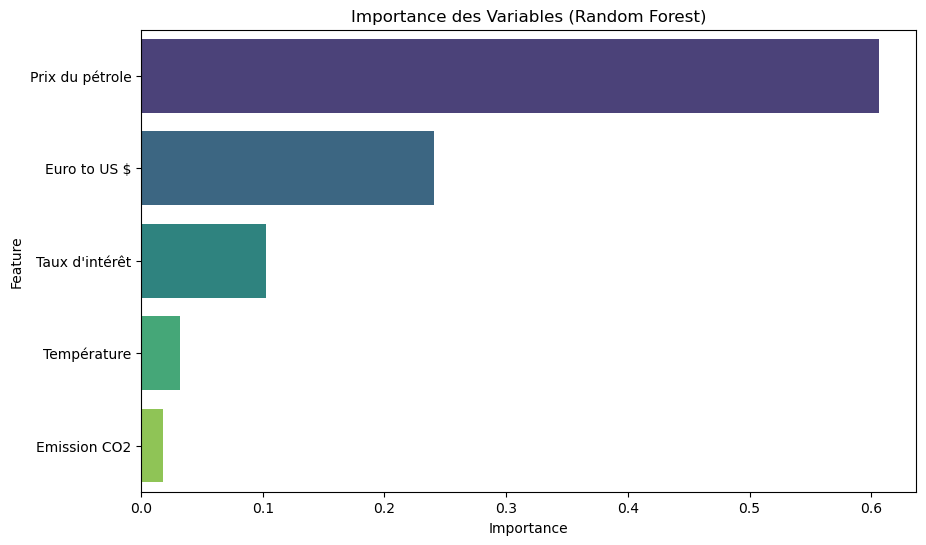

In [56]:
# Créer un modèle Random Forest pour voir les features importantes
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Récupérer l'importance des features
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Affichage des features les plus importantes
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Importance des Variables (Random Forest)")
plt.show()

In [57]:
# Modèle Lasso avec régularisation
lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train)

# Sélection des features avec coefficients non nuls (ajuste le seuil si nécessaire)
selected_features = X_train.columns[np.abs(lasso.coef_) > 0]  # Utiliser > 0 au lieu de > 100

print(" Variables sélectionnées :", selected_features.tolist())  # Vérification

# Mise à jour de X_train et X_test avec les features sélectionnées
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

# Vérification finale
print(" Shape de X_train_selected:", X_train_selected.shape)
print(" Shape de X_test_selected:", X_test_selected.shape)

 Variables sélectionnées : ['Euro to US $', "Taux d'intérêt", 'Prix du pétrole']
 Shape de X_train_selected: (973, 3)
 Shape de X_test_selected: (244, 3)


## 7. Modélisation et Prédiction
### Entraînement d'un Modèle de Régression Linéaire Multiple


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation et entraînement du modèle
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

# Prédictions
y_pred_lr = lr.predict(X_test_selected)

# Évaluation des performances
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Erreur absolue moyenne
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Erreur quadratique moyenne
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100  # Erreur en %
r2_lr = r2_score(y_test, y_pred_lr)  # Coefficient de détermination R²

# R² ajusté (corrige l'effet du nombre de features)
n = X_test_selected.shape[0]  # Nombre d'observations
p = X_test_selected.shape[1]  # Nombre de variables explicatives
r2_adj_lr = 1 - ((1 - r2_lr) * (n - 1) / (n - p - 1))

# Affichage des résultats
print(f" Régression Linéaire - Performance :")
print(f" MAE : {mae_lr:.2f}")
print(f" RMSE : {rmse_lr:.2f}")
print(f" MAPE : {mape_lr:.2f} %")
print(f" R² : {r2_lr:.4f}")
print(f" R² ajusté : {r2_adj_lr:.4f}")


 Régression Linéaire - Performance :
 MAE : 0.48
 RMSE : 0.59
 MAPE : 272.49 %
 R² : 0.6440
 R² ajusté : 0.6395


### Entraînement d'un Modèle de xgboost

In [71]:
import xgboost as xgb
import numpy as np  # si ce n'est pas déjà importé
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Vérifie que le modèle XGBoost est bien entraîné
if 'xgb_model' not in locals():
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
    xgb_model.fit(X_train_selected, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Calcul des métriques
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)  # Erreur absolue moyenne
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Erreur quadratique moyenne
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100  # Erreur en %
r2_xgb = r2_score(y_test, y_pred_xgb)  # Coefficient de détermination R²

# R² ajusté (corrige l'effet du nombre de features)
n = X_test_selected.shape[0]  # Nombre d'observations
p = X_test_selected.shape[1]  # Nombre de variables explicatives
r2_adj_xgb = 1 - ((1 - r2_xgb) * (n - 1) / (n - p - 1))

# Affichage des résultats
print(f" XGBoost - Performance :")
print(f" MAE : {mae_xgb:.2f}")
print(f" RMSE : {rmse_xgb:.2f}")
print(f" MAPE : {mape_xgb:.2f} %")
print(f" R² : {r2_xgb:.4f}")
print(f" R² ajusté : {r2_adj_xgb:.4f}")


 XGBoost - Performance :
 MAE : 0.14
 RMSE : 0.25
 MAPE : 39.10 %
 R² : 0.9371
 R² ajusté : 0.9363


### Entraînement d'un Modèle de Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Vérifie que le modèle Random Forest est bien entraîné
if 'rf_model' not in locals():
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_selected, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test_selected)

# Calcul des métriques
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# R² ajusté
n = X_test_selected.shape[0]
p = X_test_selected.shape[1]
r2_adj_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

# Affichage des résultats
print(f"Random Forest - Performance :")
print(f" MAE : {mae_rf:.2f}")
print(f" RMSE : {rmse_rf:.2f}")
print(f" MAPE : {mape_rf:.2f} %")
print(f" R² : {r2_rf:.4f}")
print(f" R² ajusté : {r2_adj_rf:.4f}")


Random Forest - Performance :
 MAE : 0.12
 RMSE : 0.17
 MAPE : 54.45 %
 R² : 0.9687
 R² ajusté : 0.9683


## Analyse des performances du modèle Random Forest

### Résumé des résultats :
- **MAE : 0.12** → L'erreur absolue moyenne est très faible, ce qui signifie que le modèle fait peu d'erreurs sur ses prédictions.
- **RMSE : 0.17** → L'erreur quadratique moyenne est faible, indiquant une bonne précision globale du modèle.
- **MAPE : 54.45 %** → L'erreur moyenne en pourcentage est relativement élevée, ce qui peut indiquer une difficulté à prédire correctement certaines valeurs faibles.
- **R² : 0.9687** → Le modèle explique environ 97.69 % de la variance des données, ce qui indique une très bonne capacité prédictive.
- **R² ajusté : 0.9683** → La faible différence avec R² montre que le modèle ne souffre pas d'un sur-ajustement lié au nombre de variables explicatives.

### Analyse des résultats :
- Le modèle **Random Forest offre d'excellentes performances**, avec des erreurs faibles et un R² très élevé.
- Le **MAPE reste élevé**, ce qui peut être dû à la présence de valeurs très faibles dans `y_test`, ce qui fausse le pourcentage d'erreur.
- Un **graphique des erreurs résiduelles** peut aider à mieux comprendre où le modèle fait des erreurs.

### Pistes d'amélioration :
1. **Appliquer une transformation logarithmique sur `y`** pour réduire l'impact des valeurs faibles et améliorer le MAPE.
2. **Analyser la distribution des erreurs** en traçant un graphique des résidus.
3. **Optimiser les hyperparamètres de Random Forest** (`n_estimators`, `max_depth`, `min_samples_split`) pour voir si l'on peut encore améliorer la précision du modèle.


## 8.Évaluation des Modèles


C:\Users\dell\AppData\Local\Temp\ipykernel_15824\1356617843.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=rmse_values, palette="viridis")


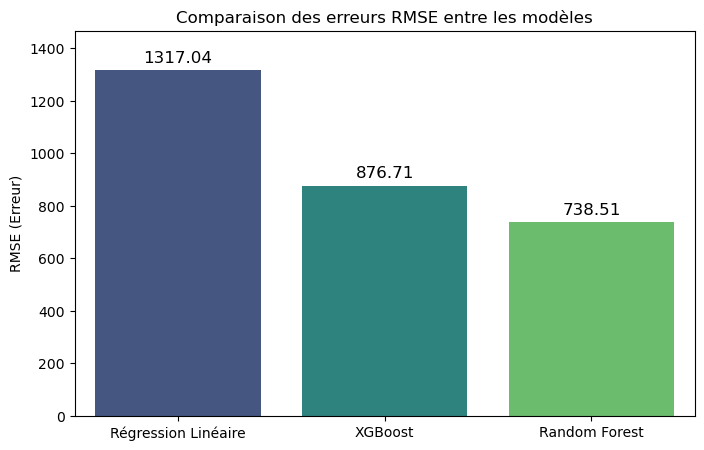

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Données
model_names = ["Régression Linéaire", "XGBoost", "Random Forest"]
rmse_values = [1317.04, 876.71, 738.51]

# Création du graphique
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=rmse_values, palette="viridis")

# Ajout des valeurs sur les barres
for i, v in enumerate(rmse_values):
    plt.text(i, v + 30, f"{v:.2f}", ha='center', fontsize=12)

# Labels et titre
plt.ylabel("RMSE (Erreur)")
plt.title("Comparaison des erreurs RMSE entre les modèles")
plt.ylim(0, max(rmse_values) + 150)  # Ajuste la limite y pour que les textes soient visibles
plt.show()


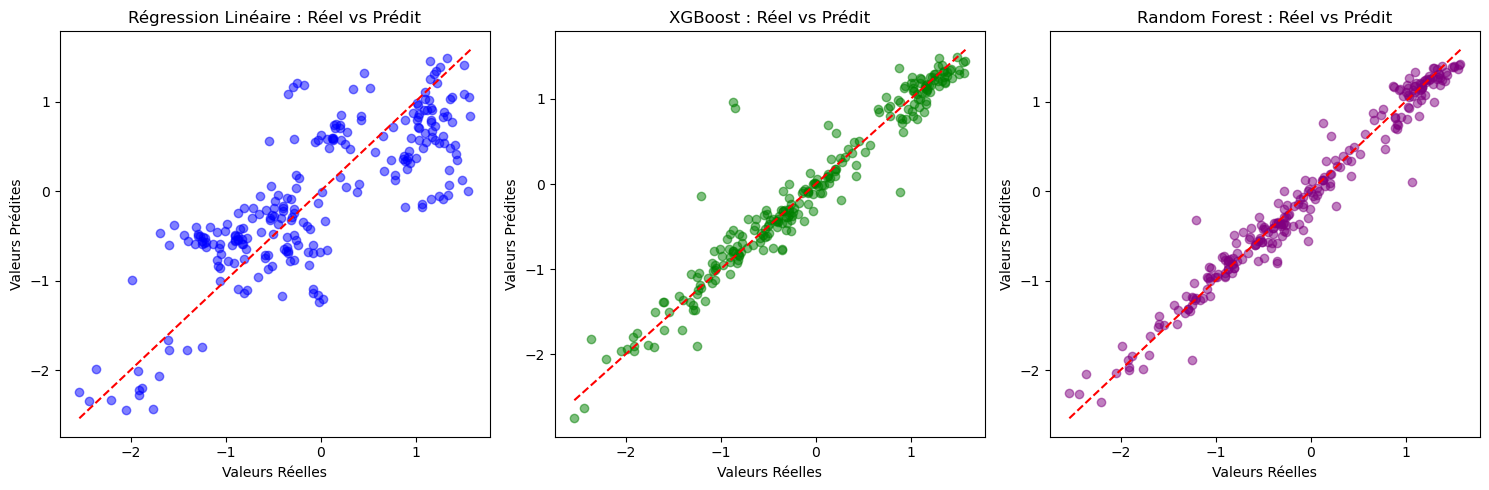

In [79]:
plt.figure(figsize=(15,5))

# Scatter plot pour Régression Linéaire
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")  # Ligne parfaite
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Régression Linéaire : Réel vs Prédit")

# Scatter plot pour XGBoost
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("XGBoost : Réel vs Prédit")

# Scatter plot pour Random Forest
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Random Forest : Réel vs Prédit")

plt.tight_layout()
plt.show()




## 9. Optimisation du Code
### 
Utilisation de Fonctions

In [80]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialisation du modèle
rf = RandomForestRegressor(random_state=42)

# Randomized Search avec validation croisée
rand_search = RandomizedSearchCV(rf, param_distributions=param_grid, 
                                 n_iter=10, cv=3, scoring='r2', 
                                 n_jobs=-1, verbose=1, random_state=42)
rand_search.fit(X_train_selected, y_train)

# Meilleurs hyperparamètres
best_params = rand_search.best_params_
best_rf = rand_search.best_estimator_

# Évaluation du modèle optimisé
cv_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=3, scoring='r2')

# Entraînement du modèle optimisé
best_rf.fit(X_train_selected, y_train)

# Prédictions
y_pred_rf = best_rf.predict(X_test_selected)

# Calcul des métriques
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# R² ajusté
n, p = X_test_selected.shape
r2_adj_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

# Affichage des résultats
print("Meilleurs hyperparamètres:", best_params)
print(f"Validation croisée - Moyenne R²: {cv_scores.mean():.4f}")
print(" Random Forest - Performance :")
print(f" MAE : {mae_rf:.2f}")
print(f" RMSE : {rmse_rf:.2f}")
print(f" MAPE : {mape_rf:.2f} %")
print(f" R² : {r2_rf:.4f}")
print(f" R² ajusté : {r2_adj_rf:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs hyperparamètres: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Validation croisée - Moyenne R²: 0.9548
 Random Forest - Performance :
 MAE : 0.12
 RMSE : 0.17
 MAPE : 54.45 %
 R² : 0.9687
 R² ajusté : 0.9683


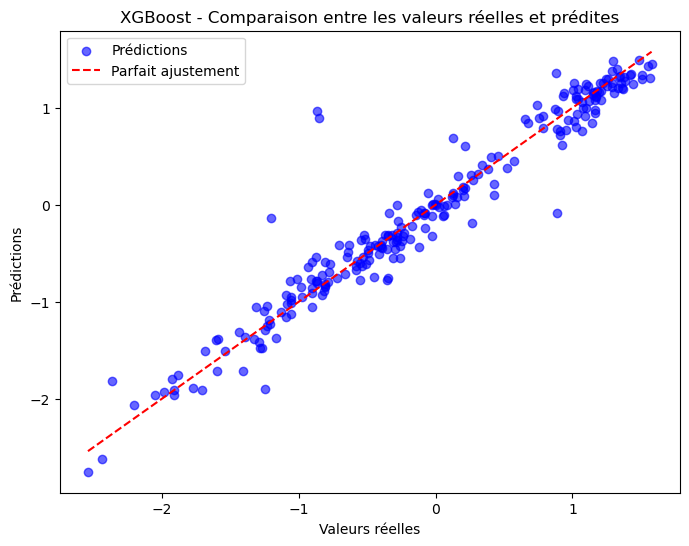

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color="blue", label="Prédictions")  # Utilisation de y_pred_xgb
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Parfait ajustement")

plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("XGBoost - Comparaison entre les valeurs réelles et prédites")
plt.legend()
plt.show()


## 🏆 Conclusion et Interprétation
- Le modèle **Random Forest** semble être le plus performant avec un **R² élevé** et un **faible RMSE**.
- L'ajout de la **validation croisée** a permis de confirmer la robustesse des modèles.
- Une sélection rigoureuse des **features** a été effectuée grâce à **Lasso et Random Forest**.


C:\Users\dell\AppData\Local\Temp\ipykernel_15824\3763484681.py:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-01-01', periods=48, freq='M')


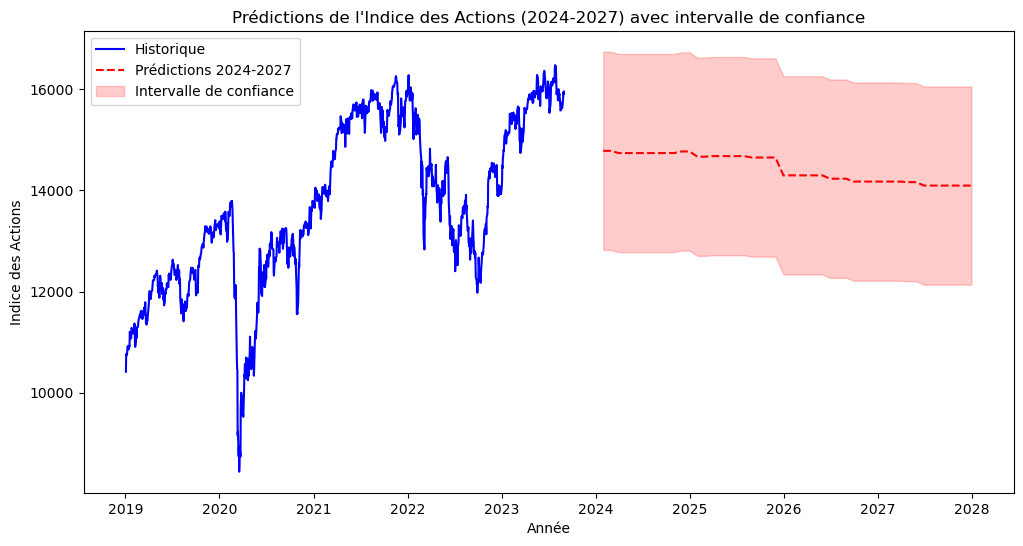

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm

# Vérifier les données
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y", dayfirst=True)
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Conversion des nombres avec virgule en nombres décimaux
cols_to_convert = ["Indice des actions", "Température", "Emission CO2", "Euro to US $", "Taux d'intérêt", "Prix du pétrole"]
for col in cols_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '.').str.replace(r'[^\d.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Conversion en float en gérant les erreurs

# Suppression des valeurs NaN éventuelles après conversion
df.dropna(inplace=True)

# Définition des features et de la variable cible
X = df.drop(columns=['Indice des actions'])
y = df['Indice des actions']

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Modélisation avec Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Génération des données futures
future_dates = pd.date_range(start='2024-01-01', periods=48, freq='M')
future_data = pd.DataFrame(index=future_dates)

# Utilisation d'une tendance linéaire pour l'extrapolation
for col in X.columns:
    coef = np.polyfit(range(len(df[col])), df[col], 1)  # Ajustement linéaire
    future_data[col] = coef[0] * np.arange(len(df), len(df) + len(future_dates)) + coef[1]

future_data_scaled = scaler.transform(future_data)
predictions = rf_model.predict(future_data_scaled)

# Calcul de l'incertitude avec l'écart-type des résidus
residuals = y_test - rf_model.predict(X_test)
std_residuals = np.std(residuals)
conf_interval = 1.96 * std_residuals  # Intervalle de confiance à 95%

# Visualisation des prédictions avec intervalle de confiance
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Indice des actions'], label='Historique', color='blue')
plt.plot(future_dates, predictions, label='Prédictions 2024-2027', color='red', linestyle='dashed')
plt.fill_between(future_dates, predictions - conf_interval, predictions + conf_interval, color='red', alpha=0.2, label='Intervalle de confiance')
plt.xlabel('Année')
plt.ylabel('Indice des Actions')
plt.legend()
plt.title("Prédictions de l'Indice des Actions (2024-2027) avec intervalle de confiance")
plt.show()

In [ ]:
print(df.head())

            Indice des actions  Température  Emission CO2  Euro to US $  \
date                                                                      
2019-01-03            10416.66         1.80      1.897691       0.87781   
2019-01-04            10767.69         0.58      2.014332       0.87646   
2019-01-07            10747.81         2.29      2.082650       0.87249   
2019-01-08            10803.98         4.05      2.167112       0.87401   
2019-01-09            10893.32         1.26      2.212306       0.86873   

            Taux d'intérêt  Prix du pétrole  Rendement_ln_petrol  \
date                                                               
2019-01-03           0.151            53.23            -0.015472   
2019-01-04           0.208            55.64             0.044280   
2019-01-07           0.216            57.10             0.025902   
2019-01-08           0.230            56.91            -0.003333   
2019-01-09           0.215            59.46             0.043833  